Import of libraries

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from functions import *
%matplotlib inline

In [38]:
#import dataset
df = pd.read_csv('kc_house_data.csv')

# Data Cleaning and Exploration
Remove NaN values and use mean of sqft_basement for placeholders in sqft_basement column.

In [39]:
noNanData = df.loc[(df.yr_renovated.isna() != True) & (df.waterfront.isna() != True) & (df.view.isna() != True)]
basementMean = noNanData.sqft_basement.map(lambda x: float(x) if x != '?' else None).mean()
noNanData.sqft_basement = noNanData.sqft_basement.map(lambda x: basementMean if x == '?' else x)

/Users/alejandro/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Turn all data to numbers

In [40]:
noNanData.date = getYear(noNanData.date)
data = noNanData.astype(float)
data = data.apply(lambda x: round(x,1))
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6.414100e+09,2014.0,538000.0,3.0,2.2,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7,-122.3,1690.0,7639.0
3,2.487201e+09,2014.0,604000.0,4.0,3.0,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5,-122.4,1360.0,5000.0
4,1.954401e+09,2015.0,510000.0,3.0,2.0,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6,-122.0,1800.0,7503.0
5,7.237550e+09,2014.0,1230000.0,4.0,4.5,5420.0,101930.0,1.0,0.0,0.0,...,11.0,3890.0,1530.0,2001.0,0.0,98053.0,47.7,-122.0,4760.0,101930.0
6,1.321400e+09,2014.0,257500.0,3.0,2.2,1715.0,6819.0,2.0,0.0,0.0,...,7.0,1715.0,291.8,1995.0,0.0,98003.0,47.3,-122.3,2238.0,6819.0


Quick description of data frame

In [41]:
print(data.describe())

                 id          date         price      bedrooms     bathrooms  \
count  1.576200e+04  15762.000000  1.576200e+04  15762.000000  15762.000000   
mean   4.593364e+09   2014.321469  5.413172e+05      3.378949      2.124794   
std    2.876078e+09      0.467055  3.722258e+05      0.935301      0.763315   
min    1.000102e+06   2014.000000  8.200000e+04      1.000000      0.500000   
25%    2.125159e+09   2014.000000  3.210000e+05      3.000000      1.800000   
50%    3.905081e+09   2014.000000  4.500000e+05      3.000000      2.200000   
75%    7.334501e+09   2015.000000  6.448750e+05      4.000000      2.500000   
max    9.895000e+09   2015.000000  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  15762.000000  1.576200e+04  15762.000000  15762.000000  15762.000000   
mean    2084.512372  1.528082e+04      1.495147      0.007613      0.229984   
std      918.617686  4.182288e+04      0.539352    

Removing and adjusting columns with little to no value based on common sense, lack of background info, and research from:  
[Berkshire Hathaway blog on determinants of home appraisals](https://berkshirehathawayhs.tomieraines.com/Blog/ID/272/13-Factors-That-Determine-Your-Home-Appraisal-Value)

In [42]:
data['renovated'] = data.yr_renovated.map(lambda x: 1 if (2020 - x) < 15 else 0)
cleanedData = data.drop(['id','date','view','yr_built','yr_renovated','sqft_lot15'],1)

Removing independent variables with correlation of .75 or greater to other independent variables

In [43]:
cleanedData.corr() > .75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,renovated
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False


In [44]:
cleanedData = cleanedData.drop(['bathrooms','sqft_above','sqft_living15'],1)

Visualizing independent variables against target variable.

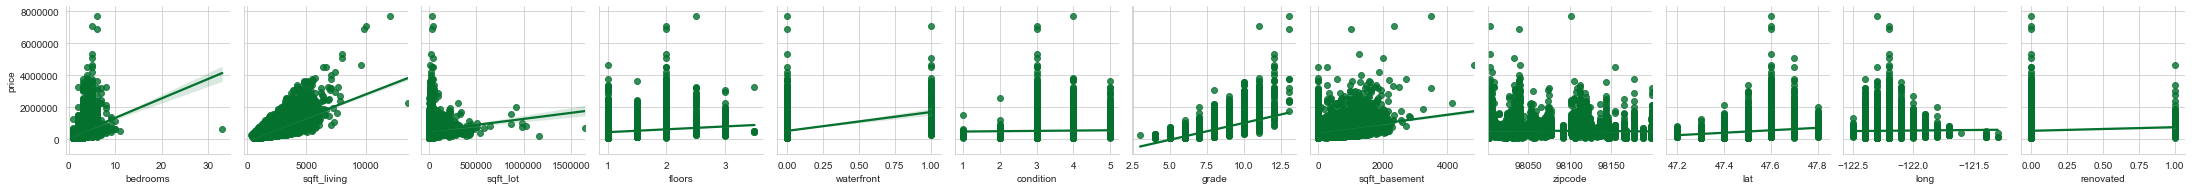

In [45]:
sns.set_style('whitegrid')
sns.set_palette('BuGn_r')
g = sns.PairGrid(cleanedData, x_vars=cleanedData.columns[1:],y_vars='price')
g.map(sns.regplot)

Removing bedrooms outliers

In [46]:
cleanedData = cleanedData.loc[(cleanedData.bedrooms < 15)]

# Creating baseline model

In [47]:
formula = getFormula('price',cleanedData)
model = ols(formula,cleanedData).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2593.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:27:26   Log-Likelihood:            -2.1594e+05
No. Observations:               15761   AIC:                         4.319e+05
Df Residuals:                   15748   BIC:                         4.320e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -4.04e+07   3.34e+06    -12.099      0.000   -4.69e+07   -3.39e+07
bedrooms      -4.149e+04   2426.477    -17.098      0.000   -4.62e+04   -3.67e+04
sqft_living     233.2382      3.980     58.596      0.000     225.436     241.040
sqft_lot          0.0187      0.043      0.434      0.664      -0.066       0.103
floors        -2.619e+04   4060.352     -6.450      0.000   -3.41e+04   -1.82e+04
waterfront     8.066e+05   2.01e+04     40.187      0.000    7.67e+05    8.46e+05
condition      5.557e+04   2779.107     19.995      0.000    5.01e+04     6.1e+04
grade          8.677e+04   2486.627     34.894      0.000    8.19e+04    9.16e+04
sqft_basement   -23.7848      5.271     -4.512      0.000     -34.117     -13.452
zipcode        -290.7327     40.492     -7.180      0.000    -370.102    -211.363
lat            6.251e+05   1.29e+04     48.387      0.000       6e+05     6.5e+05
long          -3.155e+05   1.51e+04    -20.934      0.000   -3.45e+05   -2.86e+05
renovated      1.606e+05   1.51e+04     10.635      0.000    1.31e+05     1.9e+05
==============================================================================
Omnibus:                    13216.466   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1198480.176
Skew:                           3.516   Prob(JB):                         0.00
Kurtosis:                      45.137   Cond. No.                     1.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Iteration 1:  
Removing coordinates and zipcode

In [48]:
iter1_data = cleanedData.drop(['zipcode','lat','long'],1)

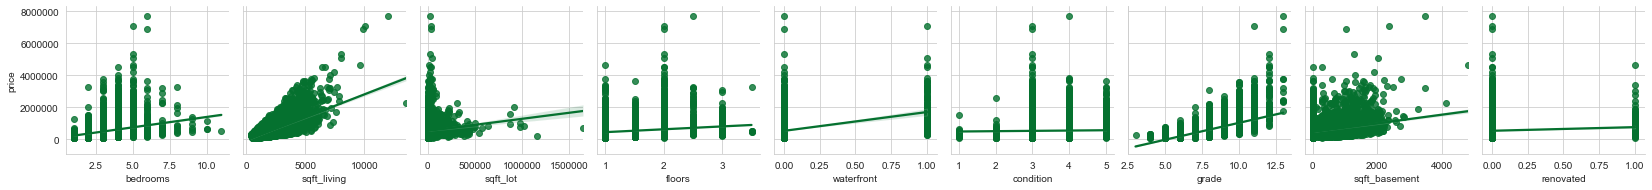

In [49]:
sns.set_style('whitegrid')
sns.set_palette('BuGn_r')
a = sns.PairGrid(iter1_data, x_vars=iter1_data.columns[1:],y_vars='price')
a.map(sns.regplot)

Log transforming sqft_lot

In [50]:
iter1_data.sqft_lot = np.log(iter1_data.sqft_lot)

Removing sqft_basement for not meeting linearity requirement

In [51]:
iter1_data = iter1_data.drop('sqft_basement',1)

Fitting model with changes

In [52]:
formula = getFormula('price',iter1_data)
model = ols(formula,iter1_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     3042.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:27:32   Log-Likelihood:            -2.1717e+05
No. Observations:               15761   AIC:                         4.344e+05
Df Residuals:                   15752   BIC:                         4.344e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.847e+05   3.02e+04     -9.425      0.000   -3.44e+05   -2.25e+05
bedrooms    -4.648e+04   2605.802    -17.835      0.000   -5.16e+04   -4.14e+04
sqft_living   235.2610      3.902     60.287      0.000     227.612     242.910
sqft_lot    -4.653e+04   2389.051    -19.478      0.000   -5.12e+04   -4.19e+04
floors      -5.133e+04   4314.732    -11.897      0.000   -5.98e+04   -4.29e+04
waterfront   8.189e+05   2.16e+04     37.841      0.000    7.76e+05    8.61e+05
condition    6.165e+04   2978.875     20.694      0.000    5.58e+04    6.75e+04
grade        1.003e+05   2628.074     38.178      0.000    9.52e+04    1.05e+05
renovated     1.82e+05   1.63e+04     11.176      0.000     1.5e+05    2.14e+05
==============================================================================
Omnibus:                    11432.495   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           668873.198
Skew:                           2.906   Prob(JB):                         0.00
Kurtosis:                      34.380   Cond. No.                     3.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Iteration 2:  
Same model as before, but including zipcode as a categorical variable. 

In [53]:
iter2_data = cleanedData.drop(['lat','long','sqft_basement'],1)
iter2_data.sqft_lot = np.log(iter2_data.sqft_lot)

Creating zipcode as categorical variable.

In [54]:
zipcode = iter2_data.astype(int)
zipcode = pd.get_dummies(zipcode,columns=['zipcode'],drop_first=True)
iter2_data = iter2_data.drop('zipcode',1)
zipcode = zipcode.drop(iter2_data.columns,1)
iter2_data = iter2_data.join(zipcode)

Fitting Model

In [55]:
formula = getFormula('price',iter2_data)
model = ols(formula,iter2_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     785.1
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:27:33   Log-Likelihood:            -2.1208e+05
No. Observations:               15761   AIC:                         4.243e+05
Df Residuals:                   15683   BIC:                         4.249e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.117e+05   2.72e+04    -29.804      0.000   -8.65e+05   -7.58e+05
bedrooms      -3.388e+04   1926.559    -17.584      0.000   -3.77e+04   -3.01e+04
sqft_living     205.6393      2.889     71.192      0.000     199.978     211.301
sqft_lot       2.935e+04   2134.449     13.750      0.000    2.52e+04    3.35e+04
floors        -1.213e+04   3312.235     -3.662      0.000   -1.86e+04   -5635.477
waterfront     8.503e+05   1.61e+04     52.802      0.000    8.19e+05    8.82e+05
condition       2.99e+04   2239.662     13.348      0.000    2.55e+04    3.43e+04
grade          6.341e+04   2025.799     31.302      0.000    5.94e+04    6.74e+04
renovated      9.388e+04   1.19e+04      7.897      0.000    7.06e+04    1.17e+05
zipcode_98002  4.626e+04   1.75e+04      2.642      0.008    1.19e+04    8.06e+04
zipcode_98003 -1.048e+04   1.57e+04     -0.669      0.503   -4.12e+04    2.02e+04
zipcode_98004  7.808e+05   1.56e+04     50.190      0.000     7.5e+05    8.11e+05
zipcode_98005  2.892e+05   1.84e+04     15.681      0.000    2.53e+05    3.25e+05
zipcode_98006  2.751e+05   1.41e+04     19.538      0.000    2.47e+05    3.03e+05
zipcode_98007  2.449e+05      2e+04     12.262      0.000    2.06e+05    2.84e+05
zipcode_98008  2.668e+05   1.58e+04     16.908      0.000    2.36e+05    2.98e+05
zipcode_98010  4.843e+04    2.3e+04      2.110      0.035    3443.471    9.34e+04
zipcode_98011   1.18e+05   1.79e+04      6.600      0.000    8.29e+04    1.53e+05
zipcode_98014  7.733e+04   2.07e+04      3.728      0.000    3.67e+04    1.18e+05
zipcode_98019  6.278e+04   1.84e+04      3.411      0.001    2.67e+04    9.89e+04
zipcode_98022  1.116e+04   1.68e+04      0.663      0.507   -2.18e+04    4.42e+04
zipcode_98023 -3.092e+04   1.38e+04     -2.237      0.025    -5.8e+04   -3821.873
zipcode_98024  1.312e+05   2.48e+04      5.283      0.000    8.25e+04     1.8e+05
zipcode_98027  1.463e+05   1.44e+04     10.136      0.000    1.18e+05    1.75e+05
zipcode_98028  1.181e+05   1.58e+04      7.483      0.000    8.71e+04    1.49e+05
zipcode_98029  2.113e+05   1.52e+04     13.861      0.000    1.81e+05    2.41e+05
zipcode_98030    62.6986   1.63e+04      0.004      0.997    -3.2e+04    3.21e+04
zipcode_98031  9610.9306   1.59e+04      0.603      0.547   -2.16e+04    4.09e+04
zipcode_98032  6693.9420   2.01e+04      0.333      0.739   -3.27e+04     4.6e+04
zipcode_98033  3.714e+05   1.43e+04     25.943      0.000    3.43e+05    3.99e+05
zipcode_98034  2.144e+05   1.36e+04     15.731      0.000    1.88e+05    2.41e+05
zipcode_98038  3.154e+04   1.34e+04      2.358      0.018    5318.798    5.78e+04
zipcode_98039  1.355e+06   3.04e+04     44.559      0.000    1.29e+06    1.41e+06
zipcode_98040   5.17e+05   1.61e+04     32.047      0.000    4.85e+05    5.49e+05
zipcode_98042  -621.2810   1.35e+04     -0.046   

### Iteration 3:  
Making the following variables as categorical values:  
Bedrooms  
Floors  
Condition  
Grade  
Adding these new categorical variables to the previous model.

In [56]:
iter3_data = pd.get_dummies(iter2_data,columns=['bedrooms','floors','condition','grade'],drop_first=True)

In [57]:
columns = []
for i in iter3_data:
    i = i.replace('.',"_")
    columns.append(i)
    
columns = dict(zip(iter3_data.columns,columns))
iter3_data = iter3_data.rename(columns,axis='columns')

In [58]:
formula = getFormula('price',iter3_data)
model = ols(formula,iter3_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     723.4
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:27:33   Log-Likelihood:            -2.1080e+05
No. Observations:               15761   AIC:                         4.218e+05
Df Residuals:                   15658   BIC:                         4.226e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.182e+05   1.62e+05     -1.345      0.179   -5.36e+05    9.98e+04
sqft_living     171.0830      2.778     61.574      0.000     165.637     176.529
sqft_lot       2.397e+04   2008.433     11.934      0.000       2e+04    2.79e+04
waterfront     8.345e+05   1.49e+04     55.999      0.000    8.05e+05    8.64e+05
renovated      1.056e+05    1.1e+04      9.606      0.000    8.41e+04    1.27e+05
zipcode_98002  1.862e+04   1.62e+04      1.150      0.250   -1.31e+04    5.04e+04
zipcode_98003  -834.4736   1.45e+04     -0.058      0.954   -2.92e+04    2.75e+04
zipcode_98004  7.719e+05   1.44e+04     53.577      0.000    7.44e+05       8e+05
zipcode_98005  2.984e+05   1.71e+04     17.500      0.000    2.65e+05    3.32e+05
zipcode_98006  2.577e+05    1.3e+04     19.770      0.000    2.32e+05    2.83e+05
zipcode_98007  2.508e+05   1.85e+04     13.589      0.000    2.15e+05    2.87e+05
zipcode_98008  2.802e+05   1.46e+04     19.211      0.000    2.52e+05    3.09e+05
zipcode_98010  3.924e+04   2.12e+04      1.851      0.064   -2313.917    8.08e+04
zipcode_98011  1.336e+05   1.65e+04      8.091      0.000    1.01e+05    1.66e+05
zipcode_98014  7.518e+04   1.92e+04      3.923      0.000    3.76e+04    1.13e+05
zipcode_98019  7.897e+04    1.7e+04      4.643      0.000    4.56e+04    1.12e+05
zipcode_98022  9944.1122   1.56e+04      0.639      0.523   -2.06e+04    4.05e+04
zipcode_98023 -2.547e+04   1.28e+04     -1.993      0.046   -5.05e+04    -423.954
zipcode_98024  1.341e+05   2.29e+04      5.848      0.000    8.92e+04    1.79e+05
zipcode_98027  1.545e+05   1.33e+04     11.582      0.000    1.28e+05    1.81e+05
zipcode_98028  1.342e+05   1.46e+04      9.210      0.000    1.06e+05    1.63e+05
zipcode_98029  2.231e+05   1.41e+04     15.811      0.000    1.95e+05    2.51e+05
zipcode_98030  5804.4624   1.51e+04      0.385      0.700   -2.37e+04    3.54e+04
zipcode_98031  1.595e+04   1.47e+04      1.084      0.278   -1.29e+04    4.48e+04
zipcode_98032  1881.8729   1.85e+04      0.101      0.919   -3.45e+04    3.82e+04
zipcode_98033  3.669e+05   1.32e+04     27.748      0.000    3.41e+05    3.93e+05
zipcode_98034  2.146e+05   1.26e+04     17.055      0.000     1.9e+05    2.39e+05
zipcode_98038  3.912e+04   1.24e+04      3.166      0.002    1.49e+04    6.33e+04
zipcode_98039  1.277e+06   2.81e+04     45.391      0.000    1.22e+06    1.33e+06
zipcode_98040  5.158e+05    1.5e+04     34.499      0.000    4.86e+05    5.45e+05
zipcode_98042  3875.8331   1.25e+04      0.310      0.756   -2.06e+04    2.84e+04
zipcode_98045  9.432e+04   1.58e+04      5.977      0.000    6.34e+04    1.25e+05
zipcode_98052  2.425e+05   1.25e+04     19.379      0.000    2.18e+05    2.67e+05
zipcode_98053  2.039e+05   1.35e+04     15.103      0.000    1.77e+05     2.3e+05
zipcode_98055   5.14e+04   1.48e+04      3.469   

# Test #1

#### Are the prices between waterfronts and non-waterfronts statistically different?

In [59]:
#importing libraries
from scipy import stats

Preparing data for analysis

In [60]:
waterfrontData = data.loc[data.waterfront == 1]
nonWaterfrontData = data.loc[data.waterfront == 0]

In [61]:
waterfront = waterfrontData.price
nonwaterfront = nonWaterfrontData.price

### Analysis  
#### Preparing hypothesis 
Null Hypothesis = mean price for samples is the same  
alternate = waterfront houses' mean is greater than the mean for non-waterfront houses   
significance value of 5%
  
#### Running Analysis

In [62]:
waterfront = stats.norm.rvs(loc=waterfront.mean(),scale=waterfront.std(),size=len(waterfront))
nonwaterfront = stats.norm.rvs(loc=nonwaterfront.mean(),scale=nonwaterfront.std(),size=len(nonwaterfront))

In [63]:
t,p = stats.ttest_ind(waterfront,nonwaterfront,equal_var=False)
#Divind P value by 2 for one-tail test
oneTail = p/2
oneTail

2.4666205374148084e-24

We reject the null due to the p-value of the test being less than then .005 level.

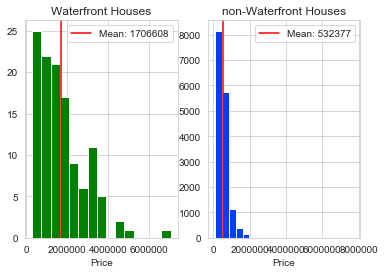

In [64]:
with plt.style.context('seaborn-bright'):
    fig,ax = plt.subplots(ncols=2)
    
    ax[0].hist(waterfrontData.price,color='green',bins=15)
    ax[0].axvline(waterfrontData.price.mean(),color='red',label="Mean: {}".format(round(waterfrontData.price.mean())))
    ax[0].legend()
    ax[0].set_title('Waterfront Houses')
    ax[0].set_xlabel('Price')
    
    ax[1].hist(nonWaterfrontData.price,bins=20)
    ax[1].axvline(nonWaterfrontData.price.mean(),color='red',label="Mean: {}".format(round(nonWaterfrontData.price.mean())))
    ax[1].legend()
    ax[1].set_title('non-Waterfront Houses')
    ax[1].set_xlabel('Price')

# Test #2

#### Are the the prices between waterfront and non-waterfron on the the same zipcodes statistically different?

Preparing data for analyis

In [65]:
waterfront = data.loc[data.waterfront == 1]

In [75]:
zipcodes = waterfront.zipcode.unique()

In [76]:
waterfrontZipcodes = data[data.zipcode.isin(zipcodes)]

In [77]:
waterfrontAccess = waterfrontZipcodes.loc[waterfrontZipcodes.waterfront == 1]
nonWaterfrontAcess = waterfrontZipcodes.loc[waterfrontZipcodes.waterfront == 0]

In [78]:
waterfrontPrice = waterfrontAccess.price
nonwaterfrontPrice = nonWaterfrontAcess.price

### Analysis  
#### Preparing hypothesis 
Null Hypothesis = mean price for both samples is the same   
alternate = the sample with a waterfront has a higher mean than the sample in the same zipcode without a waterfront   
significance value of 5%
  
#### Running Analysis

In [79]:
waterfront = stats.norm.rvs(loc=waterfrontPrice.mean(),scale=waterfrontPrice.std(),size=len(waterfrontPrice))
nonWaterfront = stats.norm.rvs(loc=nonwaterfrontPrice.mean(),scale=nonwaterfrontPrice.std(),size=len(nonwaterfrontPrice))

In [80]:
t,p = stats.ttest_ind(waterfront,nonWaterfront,equal_var=False)
oneTail = p/2
oneTail

2.299993554220349e-18

We reject the null due to the p-value of the test being less than then .005 level.

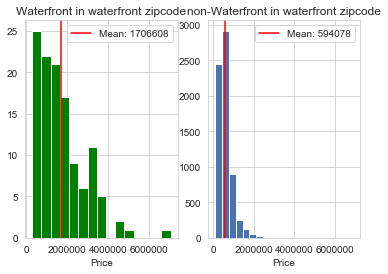

In [82]:
with plt.style.context('seaborn-deep'):
    fig,ax = plt.subplots(ncols=2)
    
    ax[0].hist(waterfrontPrice,color='green',bins=15)
    ax[0].axvline(waterfrontPrice.mean(),color='red',label="Mean: {}".format(round(waterfrontPrice.mean())))
    ax[0].legend()
    ax[0].set_title('Waterfront in waterfront zipcode')
    ax[0].set_xlabel('Price')
    
    ax[1].hist(nonwaterfrontPrice,bins=20)
    ax[1].axvline(nonwaterfrontPrice.mean(),color='red',label="Mean: {}".format(round(nonwaterfrontPrice.mean())))
    ax[1].legend()
    ax[1].set_title('non-Waterfront in waterfront zipcode')
    ax[1].set_xlabel('Price')

# Test #3


#### Are the the prices between houses renovated in the last 15 years and houses not renovated or houses renovated more than 10 years ago significantly different?

Preparing data for analysis

In [70]:
recentlyRenovated = data.loc[data.renovated == 1]
nonRenovated = data.loc[data.renovated != 1]

In [71]:
renovatedPrice = recentlyRenovated.price
nonRenovatedPrice = nonRenovated.price

### Analysis  
#### Preparing hypothesis 
Null Hypothesis = mean price for both samples is the same   
alternate = mean price for renovated houses is greater than the mean for non-renovated houses   
significance value of 5%
  
#### Running Analysis

In [72]:
renovated = stats.norm.rvs(loc=renovatedPrice.mean(),scale=renovatedPrice.std(),size=len(renovatedPrice))
nonRenovated = stats.norm.rvs(loc=nonRenovatedPrice.mean(),scale=nonRenovatedPrice.std(),size=len(nonRenovatedPrice))

In [73]:
t,p = stats.ttest_ind(renovated,nonRenovated,equal_var=False)
oneTail = p/2
oneTail

4.652092117987361e-06

We reject the null due to the p-value of the test being less than then .005 level.

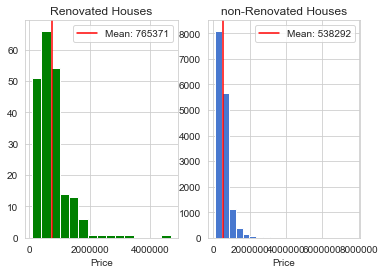

In [74]:
with plt.style.context('seaborn-muted'):
    fig,ax = plt.subplots(ncols=2)
    
    ax[0].hist(renovatedPrice,color='green',bins=15)
    ax[0].axvline(renovatedPrice.mean(),color='red',label="Mean: {}".format(round(renovatedPrice.mean())))
    ax[0].legend()
    ax[0].set_title('Renovated Houses')
    ax[0].set_xlabel('Price')
    
    ax[1].hist(nonRenovatedPrice,bins=20)
    ax[1].axvline(nonRenovatedPrice.mean(),color='red',label="Mean: {}".format(round(nonRenovatedPrice.mean())))
    ax[1].legend()
    ax[1].set_title('non-Renovated Houses')
    ax[1].set_xlabel('Price')